#### TP Semanal 4

### Enunciado

Diseñar un filtro pasabajos Chebyshev para obtener una atenuación de 48 dB para frecuencias mayores a 900 Hz, con una atenuación máxima de 0.4 dB desde continua hasta 300 Hz. ( Ancho de Banda reducido para canal Sub Lows )

| $$ \alpha_{Max} [dB] $$   | $$ \alpha_{Min} [dB] $$ | $$ f_p [Hz] $$ |  $$ f_s [Hz] $$  |
|----------|------|----------|----------|
| 0,4      | 48   | 300   | 900   |


1. Determinar el orden del filtro y el parámetro ɛ.

2. Obtener la expresion completa de la Transferencia NORMALIZADA de T(s)

3. Obtener el diagrama de polos y ceros y graficar a mano alzada en forma cualitativa la respuesta de modulo y fase. 

4. Sintetizar el circuito NORMALIZADO utilizando estructuras Kerwin–Huelsman–Newcomb (KHN, también conocido como Variable de Estado ) saliendo desde la salida V3 como indica el siguiente circuito de referencia: 

<img src="image26.png">

BONUS

    +10 💎 Simulación numérica en python
    +10 💎 Simulación Circuital con los valores DESNORMALIZADOS ( cumpliendo la plantilla pedida )
    +10  🍺 Presentación en jupyter notebook

### Orden del Filtro y Parametro $\epsilon$

Dada la ecuacion:

$$\epsilon^2 = 10^{\frac{\alpha_{Max}}{10}}-1$$

Reemplazando obtengo $\epsilon^2 = 0.096$

El orden del filtro, lo obtengo iterando de la siguiente ecuacion:

$$\alpha_{Min}[dB] = 10 log (\epsilon^2 cosh^2(n cosh^{-1}(w_s))+1)$$

Obtuve n = 5

### Transferencia Normalizada

<IPython.core.display.Math object>

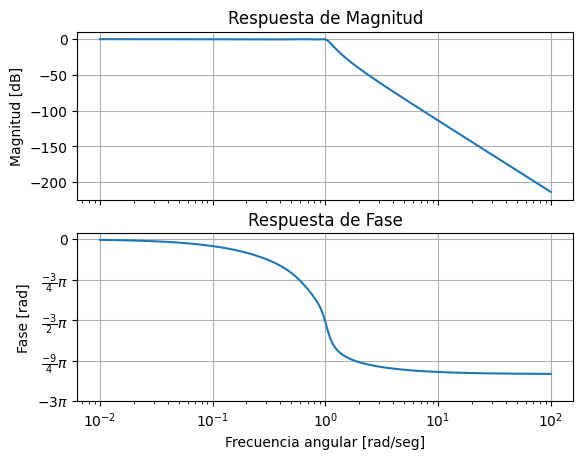

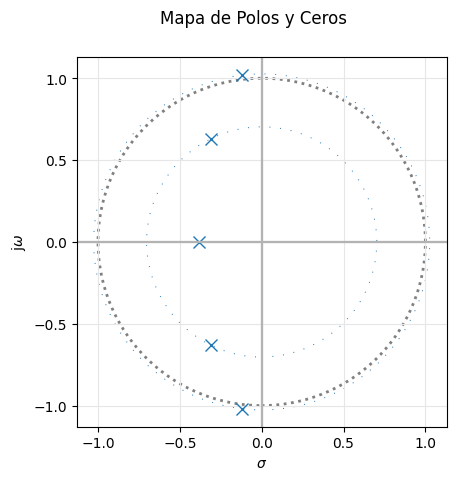

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as sig
import sympy as sp
from IPython.display import display, Math

from pytc2.sistemas_lineales import bodePlot, tf2sos_analog, pretty_print_SOS, pzmap

N = 5
ALPHA_MAX = .4

# %matplotlib inline
# matplotlib.use('Qt5Agg')

z,p,k = sig.cheb1ap(N, ALPHA_MAX)
num, den = sig.zpk2tf(z,p,k)

sos_cheb = tf2sos_analog(num, den)
display(Math("T(s) = " + pretty_print_SOS(sos_cheb, mode='omegayq', displaystr=False)))

H1 = sig.TransferFunction(num, den)
fig1, axs = bodePlot(H1)  # Obtener la figura y las subtramas
pzmap(H1)

plt.show()

### Manuscrito

Se propone hallar la transferencia del circuito propuesto:

In [9]:
from IPython.display import IFrame
IFrame("./tp4tc2.pdf", width="100%", height="600")

### Simulaciones

## Normalizado

<img src="image29.png">

<img src="image30.png">

## Desnormalizado

Se propone el siguiente circuito en el cual se aplico desnormalizacion de impedancia y frecuencia:

<img src="image27.png">

<img src="image28.png">